<a href="https://colab.research.google.com/github/sanmeshh/Synapse_LP/blob/week7/Week2NLP_Sanmesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP Task 2**

## **DJS Synapse Learning Period**
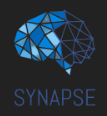

Yay, you made it to Week 2 of NLP! Last time we dealt with various ways to represent text numerically, this week we will dive into various deep learning algorithms specifically suited for NLP related applications.

An article covering multiple deep learning approaches utilised in NLP - https://medium.com/dair-ai/deep-learning-for-nlp-an-overview-of-recent-trends-d0d8f40a776d

#Create your own Embedding Layer

https://keras.io/api/layers/core_layers/embedding/

Look into what is the diiference between the embeddings we built in the previous task and the ones being built through this layer.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load the IMDB dataset again
df = pd.read_csv('/content/IMDB Dataset.csv')

In [ ]:
#Lemmatizing 50,000 reviews takes a lot of time, so if you are a busybee, run on only 5000 columns
df = df[:5000]
df.iloc[2]

,2
review,I thought this was a wonderful way to spend ti...
sentiment,positive


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import  word_tokenize

lem = WordNetLemmatizer()

In [ ]:
# Dust off the function you used last time to pre-process your data. Remember, the corpus should be a list of list of words
def text_transform(text):

    corpus = []
    stop_words=set(stopwords.words('english'))


    for sen in text:
      derived_sen=''
      sen = re.sub(r'[^a-zA-Z\s]', '', sen)
      sen = sen.lower()
      sen=sen.replace('br','')
      words = nltk.word_tokenize(sen)
      new_words= [lem.lemmatize(i) for i in words if i not in stop_words]
      for word in new_words:
        derived_sen+=word+' '

      corpus.append(derived_sen)
    return corpus


# from tqdm import tqdm
# corpus=[]
# for i in tqdm(range(len(df))):
#     rev = re.sub('^a-zA-Z', ' ', df['review'][i])
#     rev = rev.lower().split()
#     rev = [lem.lemmatize(word) for word in rev if word not in set(stopwords.words('english'))]
#     rev = ' '.join(rev)
#     corpus.append(rev)


corpus = text_transform(df['review'])

In [ ]:
corpus[:2]

['one reviewer mentioned watching oz episode youll hooked right exactly happened first thing struck oz utality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate turned prison bitch due lac

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding,Dense,Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

If you read up on Keras' Embedding layer, you know that it converts an indiced representation of your vocabulary into dense embedded vectors which you can feed into subsequent layers. We will use One-Hot representation to create this index. The one-hot library on the input vocabulary size returns an array of integers ranging from 1 to vocabulary size. It indicates the index of the '1' in the one hot representation for the word.

In [ ]:
#Find vocabulary count of your corpus
#code
corpus_sen=[]
from collections import Counter
for sen in corpus:
  sen=sen.split()
  corpus_sen+=sen
vocabulary=len(Counter(corpus_sen))




In [ ]:
corpus[:4]
vocabulary

42433

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/one_hot

In [ ]:
#Look into what format the one_hot library requires and accordingly fill data in OH_rep

OH_rep=[]
for lst in corpus:
   OH_rep.append(one_hot(lst,vocabulary))
#code

In [ ]:

max_len=len(max(corpus))

In [ ]:
# Padding: 2 types: pre padding, post padding - try both
# Wisely select the sentence length to accomodate all sentences with a couple of extra bits to avoid errors.
# Add your code here

from tensorflow.keras.preprocessing.sequence import pad_sequences
pre_pad= pad_sequences(OH_rep,maxlen=533)
post_pad=pad_sequences(OH_rep,maxlen=533,padding='post')
print(pre_pad[0])
print(post_pad[0])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In case you're still confused by Keras' Sequential Model - https://youtu.be/VGCHcgmZu24?si=ntdywfeqCcAjWWqZ

Lets make a custom Embedding Layer now.

In [ ]:
class CustomEmbeddingLayer(tf.keras.layers.Layer):

    from keras.src import ops

    def __init__(self, vocab_size, embed_dim):
        super(CustomEmbeddingLayer, self).__init__()
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        # Initialize the embedding matrix with random values

        self.embedding_matrix = self.add_weight(name="embedding_matrix",
                                               shape=(self.vocab_size, self.embed_dim),
                                               initializer="random_normal",
                                               trainable=True)

    def call(self, inputs):

      if inputs.dtype != "int32" and inputs.dtype != "int64":
            inputs = ops.cast(inputs, "int32")
      outputs = ops.take(self.embedding_matrix, inputs, axis=0)

      return  outputs
      # Map integer indices to embedding vectors
      #Look into this (hint: you can use Tensorflow for this)



In [ ]:
# select your feature dimensions: 5 for very small datasets, 10 is generally a good choice
dim=10
from keras.src import ops

In [ ]:
# Create a sequential model with the custom embedding layer along with the appropriate vocabulary size and the decided dimension size.
model=Sequential()
model.add(CustomEmbeddingLayer(vocabulary,dim))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

# Remember to add a Flatten layer to convert the input from 3D to 2D, and a final Dense layer.
#Your code here

In [ ]:
#Compile the model with optimizer adam and loss mse


model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# Code here

In [ ]:
y=pd.get_dummies(df['sentiment'])
y=y.iloc[:,1].values

In [ ]:
#Split the dataset into train,test dataset
#Code here
from sklearn.model_selection import train_test_split
X=post_pad
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
model.fit(X_train,y_train, epochs=10, verbose=2)

Epoch 1/10
125/125 - 0s - 1ms/step - accuracy: 0.9800 - loss: 0.0160
Epoch 2/10
125/125 - 0s - 2ms/step - accuracy: 0.9977 - loss: 0.0023
Epoch 3/10
125/125 - 0s - 2ms/step - accuracy: 0.9995 - loss: 9.1910e-04
Epoch 4/10
125/125 - 0s - 2ms/step - accuracy: 0.9995 - loss: 6.7804e-04
Epoch 5/10
125/125 - 0s - 2ms/step - accuracy: 0.9998 - loss: 4.8128e-04
Epoch 6/10
125/125 - 0s - 2ms/step - accuracy: 1.0000 - loss: 2.7737e-04
Epoch 7/10
125/125 - 0s - 2ms/step - accuracy: 1.0000 - loss: 1.9173e-04
Epoch 8/10
125/125 - 0s - 2ms/step - accuracy: 1.0000 - loss: 1.6594e-04
Epoch 9/10
125/125 - 0s - 2ms/step - accuracy: 1.0000 - loss: 1.4667e-04
Epoch 10/10
125/125 - 0s - 2ms/step - accuracy: 1.0000 - loss: 1.3087e-04


In [ ]:
model.evaluate(X_test,y_test,verbose=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8560 - loss: 0.1145


[0.12479142844676971, 0.8299999833106995]

Now that you tried out your own embedding layer, use Keras' inbuilt Embedding layer and run your model again. Are the accuracies comparable?

In [ ]:

model=Sequential()
model.add(Embedding(vocabulary,dim))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=10, verbose=2)

Epoch 1/10
125/125 - 1s - 10ms/step - accuracy: 0.5135 - loss: 0.2502
Epoch 2/10
125/125 - 0s - 2ms/step - accuracy: 0.8530 - loss: 0.2204
Epoch 3/10
125/125 - 0s - 2ms/step - accuracy: 0.9345 - loss: 0.1233
Epoch 4/10
125/125 - 0s - 1ms/step - accuracy: 0.9768 - loss: 0.0553
Epoch 5/10
125/125 - 0s - 2ms/step - accuracy: 0.9915 - loss: 0.0280
Epoch 6/10
125/125 - 0s - 1ms/step - accuracy: 0.9967 - loss: 0.0157
Epoch 7/10
125/125 - 0s - 2ms/step - accuracy: 0.9977 - loss: 0.0095
Epoch 8/10
125/125 - 0s - 2ms/step - accuracy: 0.9992 - loss: 0.0063
Epoch 9/10
125/125 - 0s - 2ms/step - accuracy: 1.0000 - loss: 0.0043
Epoch 10/10
125/125 - 0s - 2ms/step - accuracy: 1.0000 - loss: 0.0031


In [ ]:
model.evaluate(X_test,y_test,verbose=2)

32/32 - 1s - 16ms/step - accuracy: 0.8420 - loss: 0.1154


[0.11543301492929459, 0.8420000076293945]

#Text Generation using LSTM

LSTM Networks are used for a wide variety of purposes ranging from sentiment analysis to time series analysis, but one of its most interesting applications is text generation, which has tremendous application. All Large Language Models like GPT essentially perform is text generation, where they complete your prompt with a response deemed most appropriate to complete the prompt.

But let's back up a bit. If you didn't know, what is an LSTM Network?
Rewatch these videos -
https://youtu.be/WCUNPb-5EYI?si=4URnZuUdGkMwNmTY

https://youtu.be/YCzL96nL7j0?si=iHYqMXEV9VF1q9x2



Hopefully you can now appreciate how an LSTM is well suited to handle the challenge of text generation. Actually, wait, explain to me how LSTM's are suited to handle this task and capture context.

LSTM has two types of memory long term and short term memory. These memories help in providing context to the model which is useful in text generation.

For example:

Today, due to my current  financial conditions I..

Today, due to my current  financial conditions I **need** a loan.

The word need is predicted due to not the immediate previous words but with the help of the first word 'Today' which was stored in the long term memory of the lstm.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

Now a question arises, what are we exactly generating? It would be foolish to assume the model just spits out a fully formed block of text. We can predict either the next character of next word in a sequence, and keep doing so until we have a block of text.

Which method is better, you ask?

https://medium.com/@john.l.tauscher/word-vs-character-text-generation-80a6dbba123a#:~:text=So%2C%20for%20a%20character%20generative,below%2C%20I%20had%2012%2C700%20inputs.

For this task, we will proceed with word generation.

We need a dataset for the model to learn how to generate text, and for that we're going to pick up the very wonderful book Alice In Wonderland by Lewis Caroll. Thanks, Lewis.

https://drive.google.com/file/d/1QOcIEov-jZqiJ6K7oDnaWup81Q7l_Ji3/view?usp=drive_link

In [ ]:
# Load your text data
file_path = '/content/gdrive/MyDrive/aliceinwonderland.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

text



'Alice’s Adventures in Wonderland\n\nby Lewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\nContents\n\n CHAPTER I.     Down the Rabbit-Hole\n CHAPTER II.    The Pool of Tears\n CHAPTER III.   A Caucus-Race and a Long Tale\n CHAPTER IV.    The Rabbit Sends in a Little Bill\n CHAPTER V.     Advice from a Caterpillar\n CHAPTER VI.    Pig and Pepper\n CHAPTER VII.   A Mad Tea-Party\n CHAPTER VIII.  The Queen’s Croquet-Ground\n CHAPTER IX.    The Mock Turtle’s Story\n CHAPTER X.     The Lobster Quadrille\n CHAPTER XI.    Who Stole the Tarts?\n CHAPTER XII.   Alice’s Evidence\n\n\n\n\nCHAPTER I.\nDown the Rabbit-Hole\n\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into\nthe book her sister was reading, but it had no pictures or\nconversations in it, “and what is the use of a book,” thought Alice\n“without pictures or conversations?”\n\nSo she was considering in her own mind (as well as she could, 

In [ ]:
# Tokenize the text. Use Tokenizer provided by Keras and fit the text

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer=Tokenizer()
#our text includes multiple texts inside therefore we send it as a list.

tokenizer.fit_on_texts([text])
word=tokenizer.word_index
#code here


vocab=len(word)+1

#why is +1 taken over here

# vocabulary = #no of words in tokenizer + 1

Now, instead of just passing complete sentences into our model, we will pass n-grams of increasing length which predicts the next word. As a result, the last n-gram of a sentence consists mostly of words which have been predicted by earlier n-grams. This image should make it clearer -

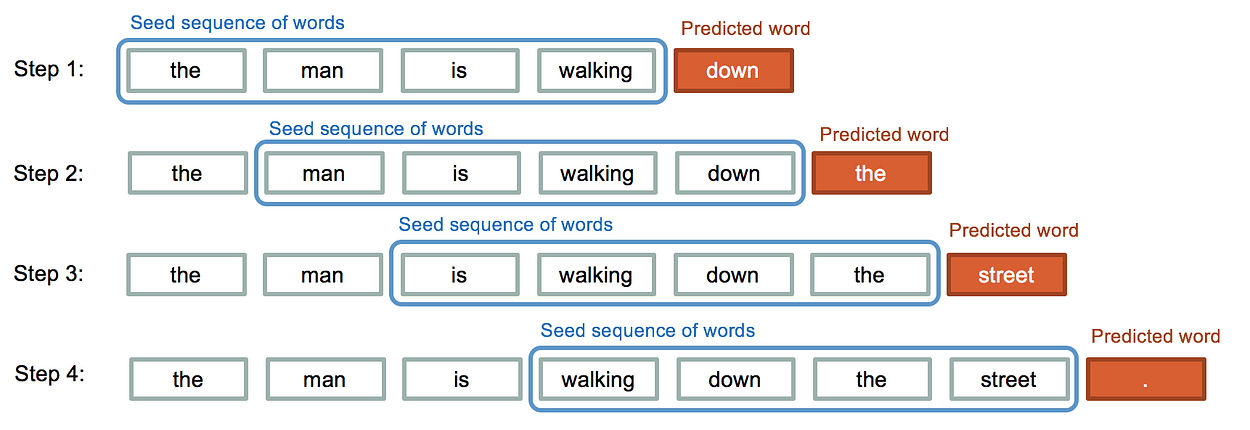

In [ ]:
# Convert text to sequences
input_sequences = []

for line in text.split('\n'):
#since its a 2Dlist with only one value we have used [0]
  tokenized_sen=(tokenizer.texts_to_sequences([line])[0])

  for i in range(1,len(tokenized_sen)):
    #adding sequences one by one i.e first bigrams(first iteration will be for i=1,[:1+1],[:2]) then trigrams and so on...)
    n_gram=tokenized_sen[:i+1]
    input_sequences.append(n_gram)

input_sequences





    #use tokenizer.sequences_to_lists to convert your text into tokens and create a list called token_list
    #create n-grams with length 1,2,3....upto length of token_list and append to input_sequences (Include the word to be predicted)


[[288, 562],
 [288, 562, 11],
 [288, 562, 11, 876],
 [70, 1594],
 [70, 1594, 1595],
 [1, 1596],
 [1, 1596, 1597],
 [1, 1596, 1597, 1598],
 [1, 1596, 1597, 1598, 1599],
 [1, 1596, 1597, 1598, 1599, 1600],
 [176, 14],
 [176, 14, 35],
 [176, 14, 35, 1],
 [176, 14, 35, 1, 88],
 [176, 14, 35, 1, 88, 629],
 [176, 1134],
 [176, 1134, 1],
 [176, 1134, 1, 348],
 [176, 1134, 1, 348, 7],
 [176, 1134, 1, 348, 7, 316],
 [176, 1135],
 [176, 1135, 5],
 [176, 1135, 5, 731],
 [176, 1135, 5, 731, 497],
 [176, 1135, 5, 731, 497, 3],
 [176, 1135, 5, 731, 497, 3, 5],
 [176, 1135, 5, 731, 497, 3, 5, 131],
 [176, 1135, 5, 731, 497, 3, 5, 131, 630],
 [176, 1136],
 [176, 1136, 1],
 [176, 1136, 1, 88],
 [176, 1136, 1, 88, 1137],
 [176, 1136, 1, 88, 1137, 11],
 [176, 1136, 1, 88, 1137, 11, 5],
 [176, 1136, 1, 88, 1137, 11, 5, 29],
 [176, 1136, 1, 88, 1137, 11, 5, 29, 289],
 [176, 1138],
 [176, 1138, 877],
 [176, 1138, 877, 128],
 [176, 1138, 877, 128, 5],
 [176, 1138, 877, 128, 5, 153],
 [176, 1139],
 [176, 1139

In [ ]:
len(input_sequences)

25265

The input_sequences list you got has n-grams of variable length, which isin't very good for training, so we pad the sequences to make them equal in length.

In [ ]:
# Pad sequences for equal length
max_sequence_length = max([len(x) for x in input_sequences])#find max length among all sequences

input_sequences = pad_sequences(input_sequences,maxlen=max_sequence_length,padding='pre')
#use pad_sequences to perform prepadding

In [ ]:
# Create predictors and labels
X, y = input_sequences[:,:-1],input_sequences[:,-1] #X is sequence of words except the last word, y is the word to be predicted(which is the last word of corresponding X row)
#Use to_categorical function of Keras to convert target words

from keras.utils import to_categorical

y=to_categorical(y,num_classes=vocab)
len(y)

25265

In [ ]:
#Create a sequential model with an Embedding layer with vocabulary, dimensions, and input_length as parameters, an LSTM with 100 units, and a Dense layer with softmax activation

#embedding layer->lstm layer->output layer(dense)
from keras.optimizers import Adam

model=Sequential()
model.add(Embedding(vocab,100,input_length=18))
model.add(LSTM(200))
model.add(Dense(vocab,activation='softmax'))

#who converts the probs given by softmax into proper classes

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.006),metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=50,verbose=1) # increase the number of epochs for better accuracy, decrease for reducing time

Epoch 1/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6900 - loss: 1.1484
Epoch 2/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7094 - loss: 1.0668
Epoch 3/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7134 - loss: 1.0361
Epoch 4/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7265 - loss: 0.9748
Epoch 5/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7373 - loss: 0.9426
Epoch 6/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7565 - loss: 0.8752
Epoch 7/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7460 - loss: 0.9047
Epoch 8/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7467 - loss: 0.8881
Epoch 9/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7550 - loss: 0.8724
Epoch 10/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7548 - loss: 0.8541
Epoch 11/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7608 - loss: 0.8283
Epoch 12/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step

In [ ]:
model.evaluate(X,y)

790/790 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8013 - loss: 0.6679


[0.6723901629447937, 0.7996833324432373]

In [ ]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]#Convert seed_text into tokens
        token_list = pad_sequences([token_list],maxlen=max_sequence_length,padding='pre'),#Perform prepadding on text
        predicted_probs = model.predict(token_list, verbose=0)
        predicted =np.argmax(predicted_probs) #return index of max probability value from the predictions

        output_word =''
        word_index=list(word.items())
        for i in range(len(word_index)):
          if word_index[i][1]==predicted:
            output_word=word_index[i][0]

        #Search through the index list of your tokenizer (word_index) and if it matches the predicted index, save it as output_word and break

        seed_text += " " + output_word
    return seed_text

# Generate text
generated_text = generate_text('Alice was',20,model, max_sequence_length)


print(generated_text)



Alice was rather doubtful whether she ought not to lie down upon her face with such a puzzled expression that you shall


Hey, not bad! There is some coherence in outputted text which matches the style of the input text. Now its your turn to try and make the output make more sense by improving the model. Add more layers, increase the epochs, use a bigger dataset, play around with it! For example, you can load a document which has all the works of shakespeare and see how the output changes.

Do you now have some more respect for poor ChatGPT, which spits highly coherent and verbose sentences in the blink of an eye? Imagine how much training went into that.

In [ ]:
# import numpy as np
# np.argmax(predicted_probs[0])
list(word.items())[2][0]

Well, if you look at it closely, we're kinda cheating (but not really) by having words in our tokenizer since our model always defaults to a word in the vocab and shows some coherence. If you really wanna get wild, try out character generation and get coherent outputs from that -

https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/

Starting out, obviously you get a lot of random character wishwash, but many many iterations in, you can see the model truly attempt to capture the word style of the original document.

# Question Answering using RNN




First things first, what are RNN's ?

https://www.youtube.com/watch?v=UNmqTiOnRfg

https://www.youtube.com/watch?v=OuYtk9Ymut4

For the adventurous people who need a challenge in life

https://www.analyticsvidhya.com/blog/2019/01/fundamentals-deep-learning-recurrent-neural-networks-scratch-python/

So everybody's heard about Sentiment Analysis. We are NOT going to do that here. Well, not in its rudimentary way. For a sentence which we know is positive, the question would essentially be, what part of the sentence is positive, and given the sentence as context, the answer gives you the part of the sentence which caused it to be positive. All possible through the power of RNN's. Let's start.

https://drive.google.com/file/d/1tR82E9MmUpTUdJzrng8z1iVgBlBiX08A/view?usp=drive_link

In [ ]:
# write code to load the dataset
import pandas as pd


qna=pd.read_csv("/content/gdrive/MyDrive/ques_ans.csv")


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
context_tokenizer = Tokenizer()

#Fit your tokenizer on the text column
qna['text']=qna['text'].astype('str')
qna['selected_text']=qna['selected_text'].astype('str')


context =context_tokenizer.texts_to_sequences(qna['text']) #Convert texts to sequences with the tokenizer for text column

answers =context_tokenizer.texts_to_sequences(qna['selected_text']) #Convert texts to sequences with the tokenizer for the selected_text column


#https://dev.to/balapriya/tokenization-and-sequencing-in-tensorflow-3p0n


#Finding the beginning and ending position of the answer in the context list
beg_pos = [[1 if a[x:x+len(b)] == b else 0 for x in range(len(a))] for a, b in zip(context, answers)]
end_pos = [[1 if a[x:x+len(b)] == b else 0 for x in range(len(a))] for a, b in zip(context, answers)]

In [ ]:
len(beg_pos)

27481

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

context = np.array(pad_sequences(context, maxlen=36, padding='post', truncating='post'))
#Do the same for beg_pos and end_pos

beg_pos= np.array(pad_sequences(beg_pos, maxlen=36, padding='post', truncating='post'))

end_pos=context = np.array(pad_sequences(end_pos, maxlen=36, padding='post', truncating='post'))
# Using numpy, check for rows in 'beg_pos' where all elements are zero



index=np.where(~np.all(beg_pos==0,axis=1))

beg_pos=beg_pos[index]
end_pos=end_pos[index]
context=context[index]

# Filter out rows in the arrays context, beg_pos, and end_pos where 'beg_pos' is all zero

# Add a new axis to 'beg_pos' and 'end_pos'
beg_pos = np.expand_dims(beg_pos, axis=2)
end_pos = np.expand_dims(end_pos, axis=2)

# Concatenate 'beg_pos' and 'end_pos' along the third axis, creating a 3D array
ans_vec = np.concatenate((beg_pos, end_pos), axis=2)

context.shape, beg_pos.shape, end_pos.shape, ans_vec.shape

((26236, 36), (26236, 36, 1), (26236, 36, 1), (26236, 36, 2))

In [ ]:
question_tokenizer = Tokenizer()

question_tokenizer.fit_on_texts(qna.sentiment.fillna(''))
question = question_tokenizer.texts_to_sequences(qna.sentiment.fillna(''))
#  write code to pad sequences for question, like in the previous cell

question = np.array(pad_sequences(question, maxlen=36, padding='post', truncating='post'))


question=question[index]


# Filter out rows in the question array where 'beg_pos' is all zero



In [ ]:
# perform train test split on context(text), question(sentiment) and ans_vec(selected_text) and print its shape
from sklearn.model_selection import train_test_split

context_train,context_test=train_test_split(context,test_size=0.1)
question_train,question_test=train_test_split(question,test_size=0.1)
ans_train,ans_test=train_test_split(ans_vec,test_size=0.1)

print(context_train.shape)
print(context_test.shape)
print(question_train.shape)
print(question_test.shape)
print(ans_train.shape)
print(ans_test.shape)


# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=)

(23612, 36)
(2624, 36)
(23612, 36)
(2624, 36)
(23612, 36, 2)
(2624, 36, 2)


https://keras.io/api/layers/merging_layers/concatenate/

GRU(Gated Recurrent Units) - https://youtu.be/tOuXgORsXJ4?si=BG9l-HXTijxaovHO

Model: "Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ context (InputLayer)      │ (None, 36)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ question (InputLayer)     │ (None, 36)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ context_embeddings        │ (None, 36, 64)         │      1,702,336 │ context[0][0]          │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ question_embeddings       │ (None, 36, 64)         │            256 │ question[0][0]         │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ context_gru (GRU)         │ (None, 36, 64)         │         24,960 │ context_embeddings[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ question_gru (GRU)        │ (None, 36, 64)         │         24,960 │ question_embeddings[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 36, 128)        │              0 │ context_gru[0][0],     │
│                           │                        │                │ question_gru[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 36, 2)          │            258 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,752,770 (6.69 MB)

 Trainable params: 1,752,770 (6.69 MB)

 Non-trainable params: 0 (0.00 B)

None


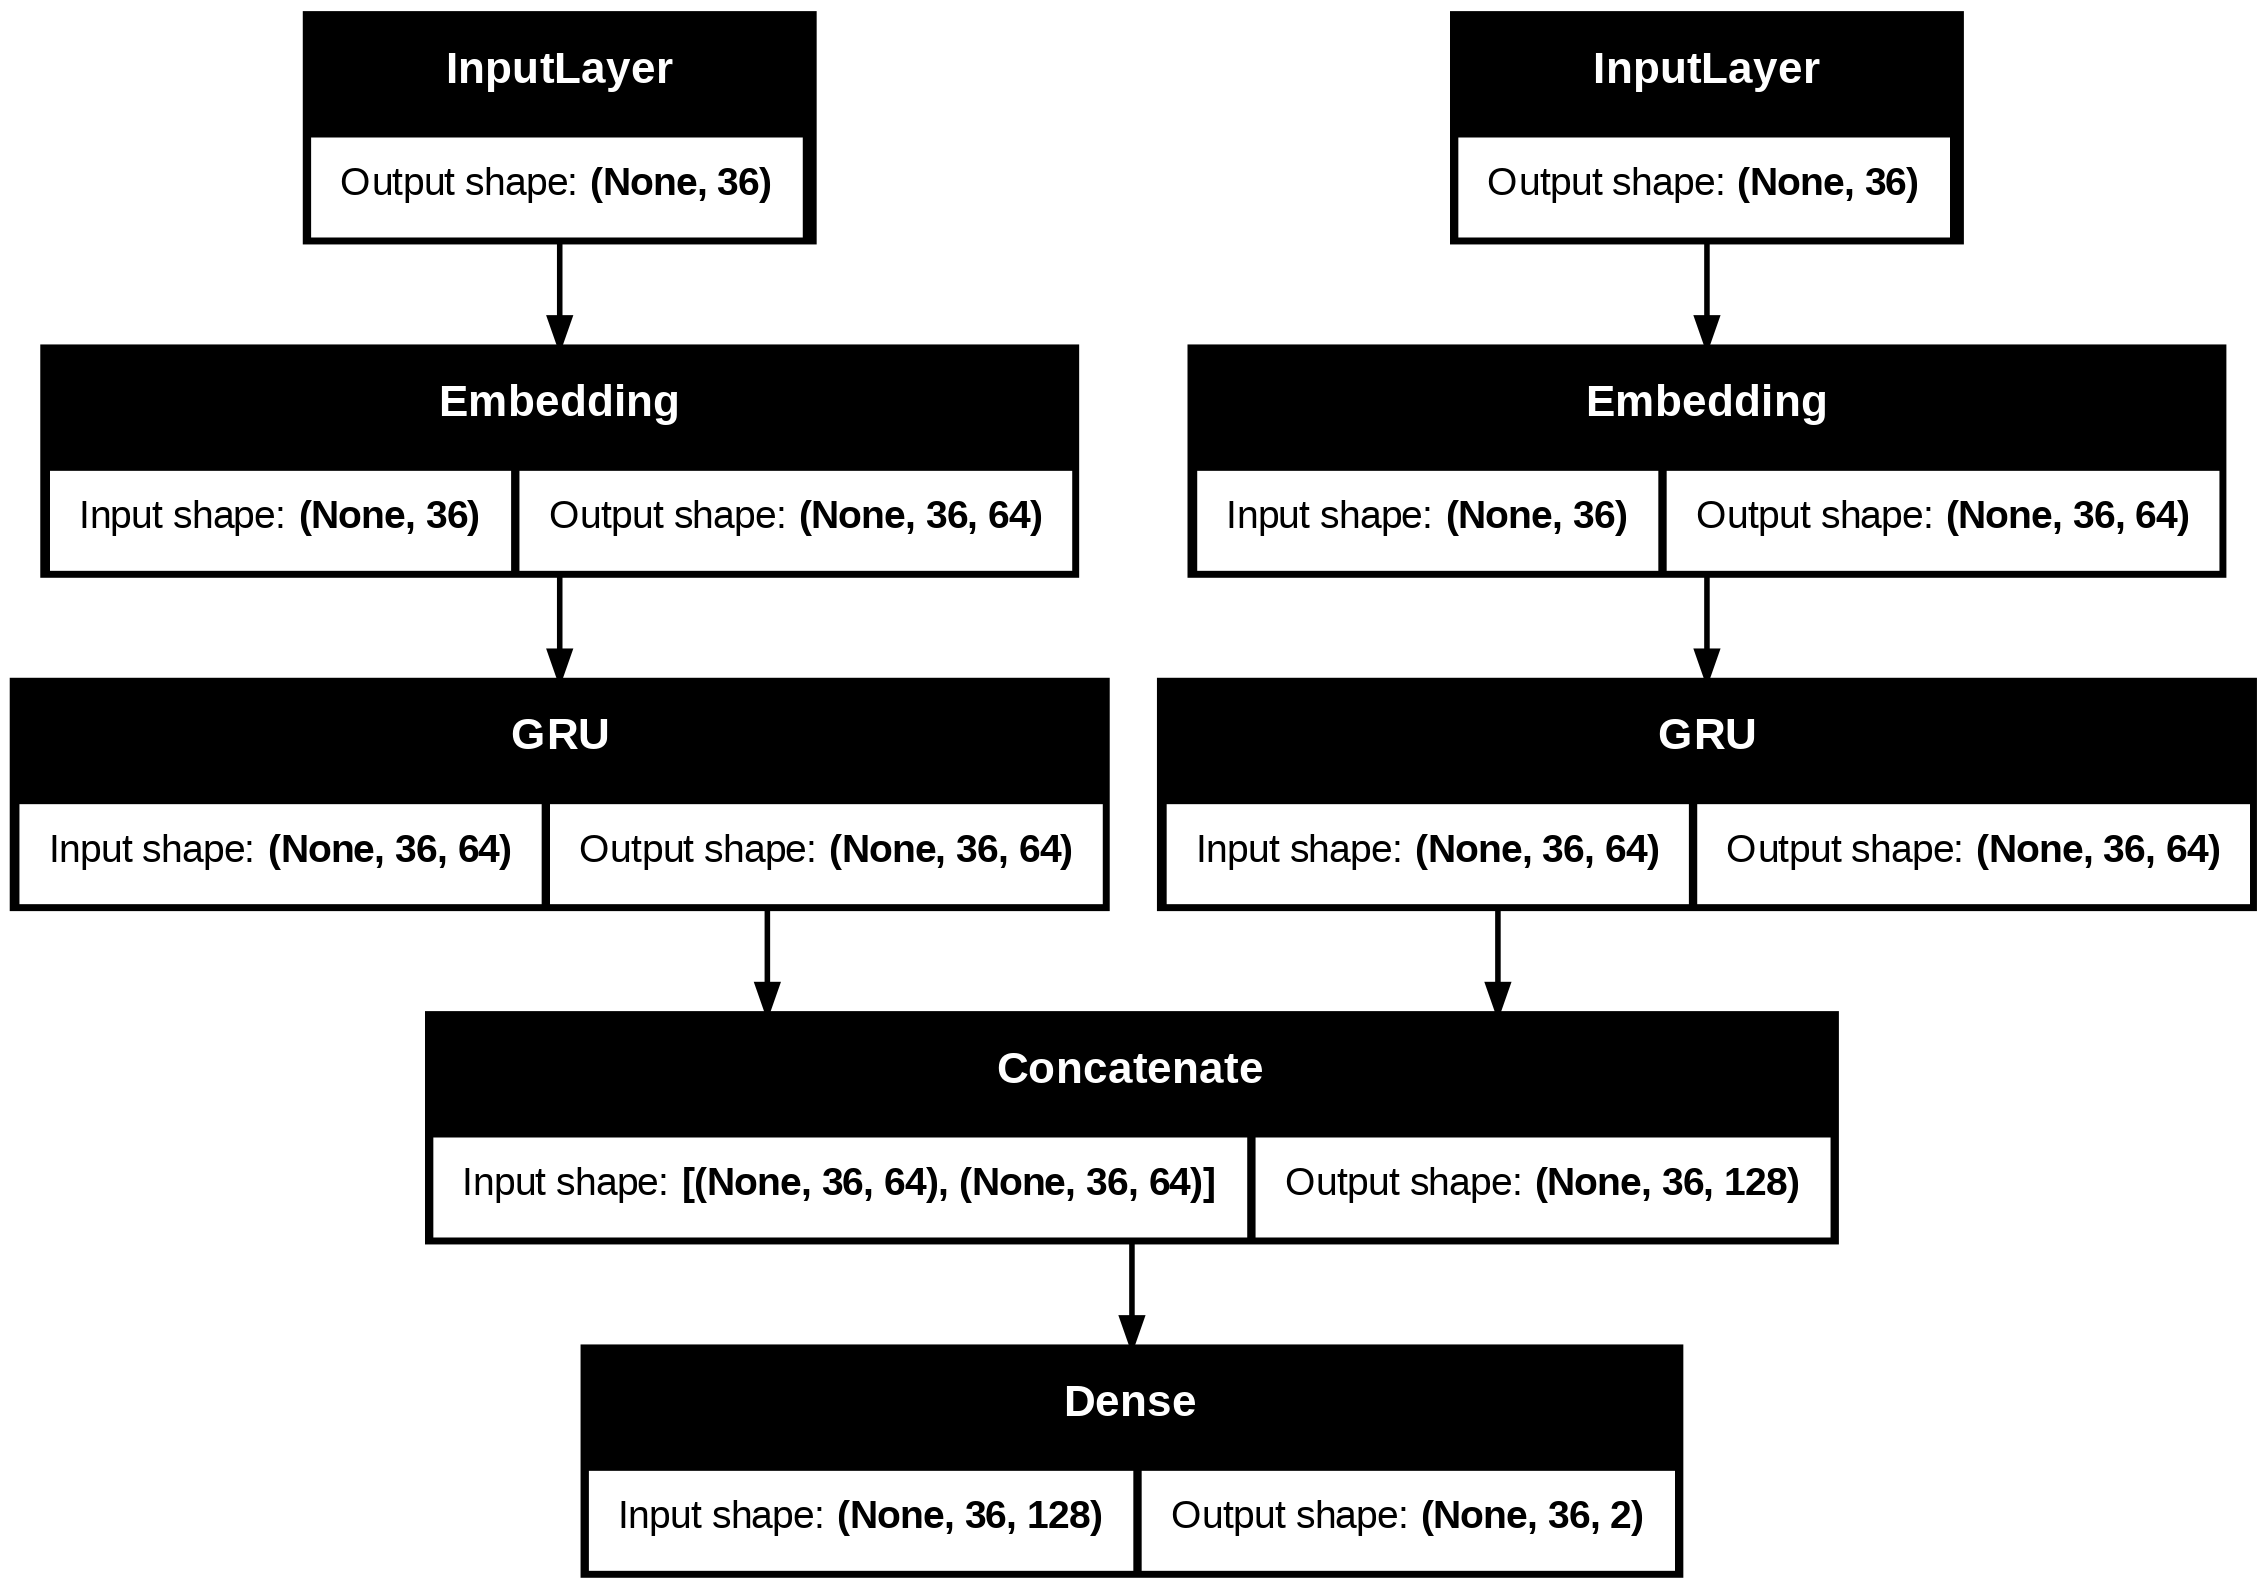

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers as L

EMBED_DIM = 64
N_REC = 64


# create input layers for context_inp and question_input. Name it context and question
context_inp=keras.Input(shape=(36,),name="context")
question_inp=keras.Input(shape=(36,),name="question")



context_emb = L.Embedding(len(context_tokenizer.word_index)+1, EMBED_DIM, name='context_embeddings')(context_inp)
question_emb = L.Embedding(len(question_tokenizer.word_index)+1, EMBED_DIM, name='question_embeddings')(question_inp)



# create GRU layers for context_emb and question_emb, keep return_sequences = True

gru=L.GRU(units=N_REC,return_sequences=True,name="context_gru")
gru2=L.GRU(units=N_REC,return_sequences=True,name="question_gru")
context_gru=gru(context_emb)
question_gru=gru2(question_emb)

#write code to concatenate these 2 embedding layers, and create a Dense layer for the output

merg=keras.layers.Concatenate(name="concatenate")([context_gru, question_gru])


outputs=Dense(2,activation='softmax')(merg)
model = keras.Model(inputs=[context_inp, question_inp], outputs=outputs,name="Model")



model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(1e-4))
print(model.summary())
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
es = keras.callbacks.EarlyStopping(min_delta=1e-4, patience=5, verbose=1, restore_best_weights=True)
rlp = keras.callbacks.ReduceLROnPlateau(patience=2, verbose=1)

history=model.fit([context_train,question_train],ans_train,epochs=25,callbacks=[es,rlp],validation_split=0)
# fit the model with train data for [context, question] and ans_vec, and similarly write code for validation data, store it in a variable named 'history'
# do not forget to keep the number of epochs as 25 and the callbacks as es and rlp


Epoch 1/25
738/738 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.1818 - learning_rate: 1.0000e-04
Epoch 2/25
 13/738 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.1005

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


738/738 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0826 - learning_rate: 1.0000e-04
Epoch 3/25
738/738 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0768 - learning_rate: 1.0000e-04
Epoch 4/25
738/738 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0785 - learning_rate: 1.0000e-04
Epoch 5/25
738/738 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0785 - learning_rate: 1.0000e-04
Epoch 6/25
738/738 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0785 - learning_rate: 1.0000e-04
Epoch 7/25
738/738 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0784 - learning_rate: 1.0000e-04
Epoch 8/25
738/738 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0768 - learning_rate: 1.0000e-04
Epoch 9/25
738/738 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.0779 - learning_rate: 1.0000e-04
Epoch 10/25
738/738 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0777 - learning_rate: 1.0000e-04
Epoch 11/25
738/738 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0786 - learning_rate: 1.0000e-04
Epoch 12/25
738/738 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms

In [ ]:
context_train,context_valid=train_test_split(context_train,test_size=0.2)
question_train,question_valid=train_test_split(question_train,test_size=0.2)
ans_train,ans_vec_valid=train_test_split(ans_train,test_size=0.2)

In [ ]:
idx = 28
query_context = context_valid[idx:idx+1]
query_question = question_valid[idx:idx+1]
query_ans_vec = ans_vec_valid[idx:idx+1]
query_ans_beg, query_ans_end  = np.ravel(ans_vec_valid[idx:idx+1].argmax(axis=1))  #Look into what this does, returns contiguous flattened array
print('Context:', context_tokenizer.sequences_to_texts(query_context))
print('Question:', question_tokenizer.sequences_to_texts(query_question))
print('Answer:', context_tokenizer.sequences_to_texts([query_context[0][query_ans_beg: query_ans_end+1]]))
pred_ans_beg, pred_ans_end = np.ravel(model([query_context, query_question]).numpy().argmax(axis=1))
print('Predicted Answer:', context_tokenizer.sequences_to_texts([query_context[0][pred_ans_beg: pred_ans_end+1]]))

Context: ['i']
Question: ['negative']
Answer: ['']
Predicted Answer: ['']


Just for fun, here is a cell to put custom inputs and predict which part of the sentence matches the question you input.

In [ ]:
def predict_custom_input(custom_context, custom_question):
    # Tokenize and preprocess the custom input
    custom_context_seq = context_tokenizer.texts_to_sequences([custom_context])
    custom_context_padded = np.array(pad_sequences(custom_context_seq, maxlen=36, padding='post', truncating='post'))

    custom_question_seq = question_tokenizer.texts_to_sequences([custom_question])
    custom_question_padded = np.array(pad_sequences(custom_question_seq, maxlen=36, padding='post', truncating='post'))

    # Make predictions using the trained model
    predictions = model.predict([custom_context_padded, custom_question_padded])

    # Extract predicted answer indices
    pred_ans_beg, pred_ans_end = np.ravel(predictions.argmax(axis=1))

    # Convert indices to text
    pred_answer_text = context_tokenizer.sequences_to_texts([custom_context_padded[0][pred_ans_beg: pred_ans_end+1]])

    # Print the results
    print('Custom Input:')
    print('Context:', custom_context)
    print('Question:', custom_question)
    print('Predicted Answer:', pred_answer_text)

# Example usage:
custom_context_input = input("Your custom context goes here.")
custom_question_input = input("Your custom question goes here.")
predict_custom_input(custom_context_input, custom_question_input)



Your custom context goes here.I am going to chill
Your custom question goes here.positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Custom Input:
Context: I am going to chill
Question: positive
Predicted Answer: ['chill']


# <font color='#4879E2'>More resources</font>

1)Yoav Goldberg's book [Neural Network Methods for Natural Language Processing](http://www.morganclaypool.com/doi/abs/10.2200/S00762ED1V01Y201703HLT037) is a thorough introduction to neural networks for NLP tasks in general.

2)If you'd like to learn more about what Keras is doing under the hood, there is a [Theano tutorial](http://deeplearning.net/tutorial/lstm.html) that also applies an RNN to sentiment prediction, using the same dataset here

Andrej Karpathy's blog post [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) is very helpful for understanding the mathematical details of an RNN, applied to the task of language modeling. It also provides raw Python code with an implementation of the backpropagation algorithm.

3)TensorFlow also has an RNN language model [tutorial](https://www.tensorflow.org/versions/r0.12/tutorials/recurrent/index.html) using the Penn Treebank dataset

Chris Olah provides a good [explanation](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) of how LSTM RNNs work (this explanation also applies to the GRU model used here)

Denny Britz's [tutorial](http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/) documents well both the technical details of RNNs and their implementation in Python.

#Research Task

Look into how Named Entity Recognition and Parts of Speech Tagging work and show your research for the same.

A subtask in NLP that identifies entities in the given docs and classify them into categories like person,organization,data,place.
There are many methods according to which  named entity recognition works:

1.**Rule based method**:

Rule-based approaches involve creating a set of rules for the grammar of a language (say english). The rules are then used to identify entities in the text based on their structural and grammatical features. These methods can be time-consuming and may not generalize well to unseen data.

2.**ML methods**:

Techniques can range from traditional machine learning methods (e.g., decision trees and support vector machines) to more complex deep learning approaches, like recurrent neural networks (RNNs) and transformers.Especially the deep learning techniques like use of RNNs and transformers like BERT provide state of the art performance since there are pre-trained models available for transformers.

3.**Hybrid Approaches**:

Since there is no one fit all solution for NER , we combine rule-based and machine learning methods to leverage the strengths of both. They can use a rule-based system to quickly identify easy-to-recognize entities and a machine learning system to identify more complex entities.However due to this intertwining the model becomes more and more complex.

Steps in NER:

1) **Data collection**

2) **Data preprocessing:** Docs are tokenized and unecessary characters are removed (and all other basic tasks we do in pre-processing of text)

3)Feature Extraction:This is an integral step since it helps in providing contextual info to the model. One method used in this step is called **Parts Of Speech (POS) tagging**.

What is POS tagging? **bold text**

->The process in each word in a given sentence is labelled with its appropriate part of speech such as noun,verb,adverb,model,etc is called as POS tagging.

The most used is the Hidden Markov Model(HMM):

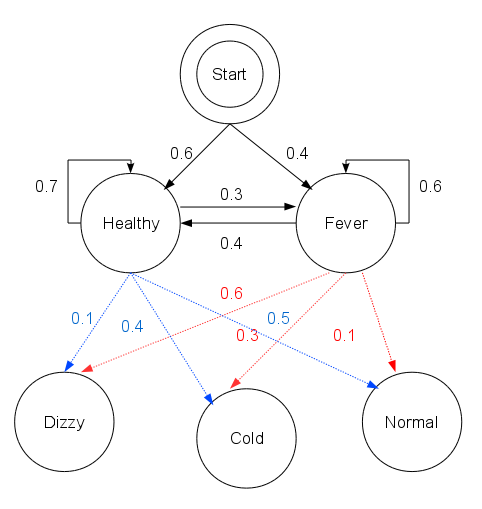




The model is based on two probabilities , Emission Probability and Transition Probability.

**Emission Probability**:

This is used for indicating how likely a word will be a noun or a verb etc in the corpus.

**Transition Probability**:

How likely a given word will be the 'next' word or the last word of a sentence.

These probabilities back the ability of the Hidden Markov Model to predict the part of speech of the words in a sentence.For  eg, Will Will come for the party. Here the first 'Will' is a model and the second 'Will' is a noun.To clear this type of ambiguities the model uses an algorithm called Viterbi alogrithm.

**Viterbi Algorithm**:

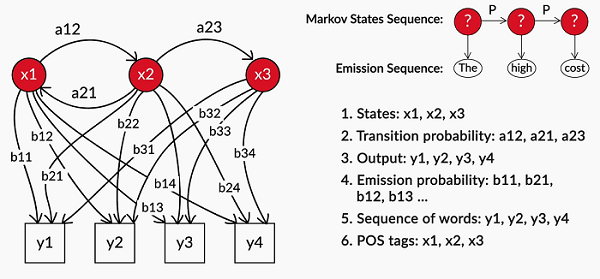

The algorithm computes the product of the emission probabilites and the transition probabilties for a sequence like start->noun->model->verb->noun->end or start->model->noun->verb->model->end etc proceeds to each new step (while forming the sequence) which has the highest probability product. And then predicts the part of the speech of the words according to the sentence while capturing the semantic meanning.

Several other methods of feature extraction like use of word embeddings or a tranformer model can be used.

4)**Using  ML models for training**:

The model learns to identify patterns and relationships between words in the text, as well as their corresponding named entity labels.

5)**Model Evaluation**:

The model is evaluated as usual in terms accuracy and f1 score . Further it is processed and re-evaluated according to the expectations of the user from the model.

Resources:https://www.ibm.com/topics/named-entity-recognition , https://wisdomml.in/hidden-markov-model-hmm-in-nlp-python/ , https://medium.com/@pnandhiniofficial/get-to-know-about-named-entity-recognition-20a3d9033647 ,











